# King County Housing Data Multiple Linear Regression

The purpose of this notebook is to explore the relationship between the various parameters of information included in the dataset kc_house_data.csv to identify any correlation to the cost of a house. 

The first step is to load the data into a pandas DataFrame.

In [2]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import os

In [4]:
filename = "kc_house_data.csv"
data_frame = pd.read_csv(filename)

**Now we can double-check our data using the head() method to see the first 5 rows.**

In [6]:
data_frame.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


**Some things to know about how this data was collected (aside from the other self explanatory parameters):**

- Price is the target prediction numeric for our model
- Waterfront is denoted by either 1 if the house has a waterfront view or 0 otherwise
- View is rated on a scale of 0-4, 0 being a poor view and 4 being beautiful
- Condition represents the overall condition of the house, 1 indicates a worn out property and 5 is excellent
- Grade represents King County's general rating system, 1 being poor and 13 being excellent

**Now we can plot some histograms to get a quick visualization of the data counts.**

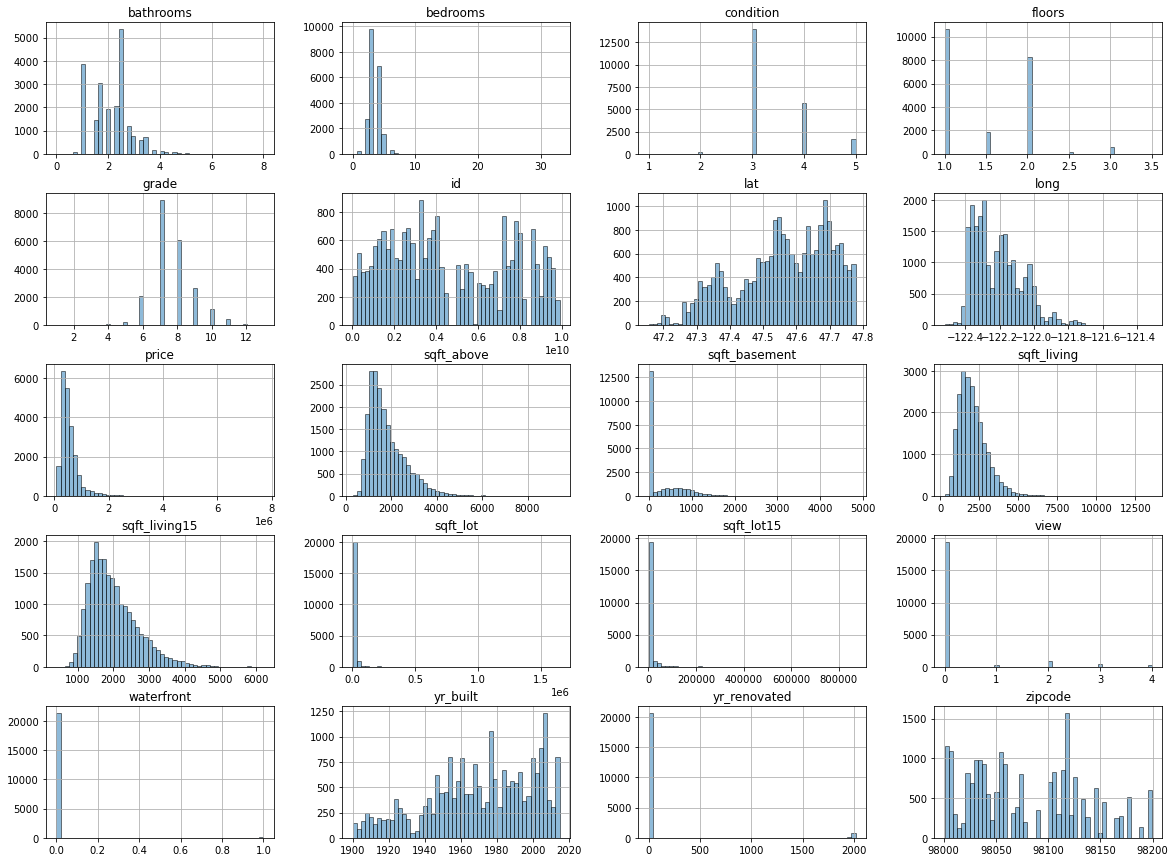

In [7]:
data_frame.hist(bins = 50, alpha=0.5, histtype='bar', ec='black', figsize = (20,15))
plt.show()

**A couple things that we can notice right off the bat is the that:**

- The large majority of houses have no basement, have no view of the waterfront and have never been renovated, we can see this clearly for discrete parameters, but for continuous values such as sqft_basement we will have to double-check
- Since plot sizes can never actually be zero, this means that outliers are increasing the scale of our lot histograms, grouping the majority of lot sizes into the first bin which denotes some interval starting at 0

The range capped histogram of sqft_lot below highlights this.

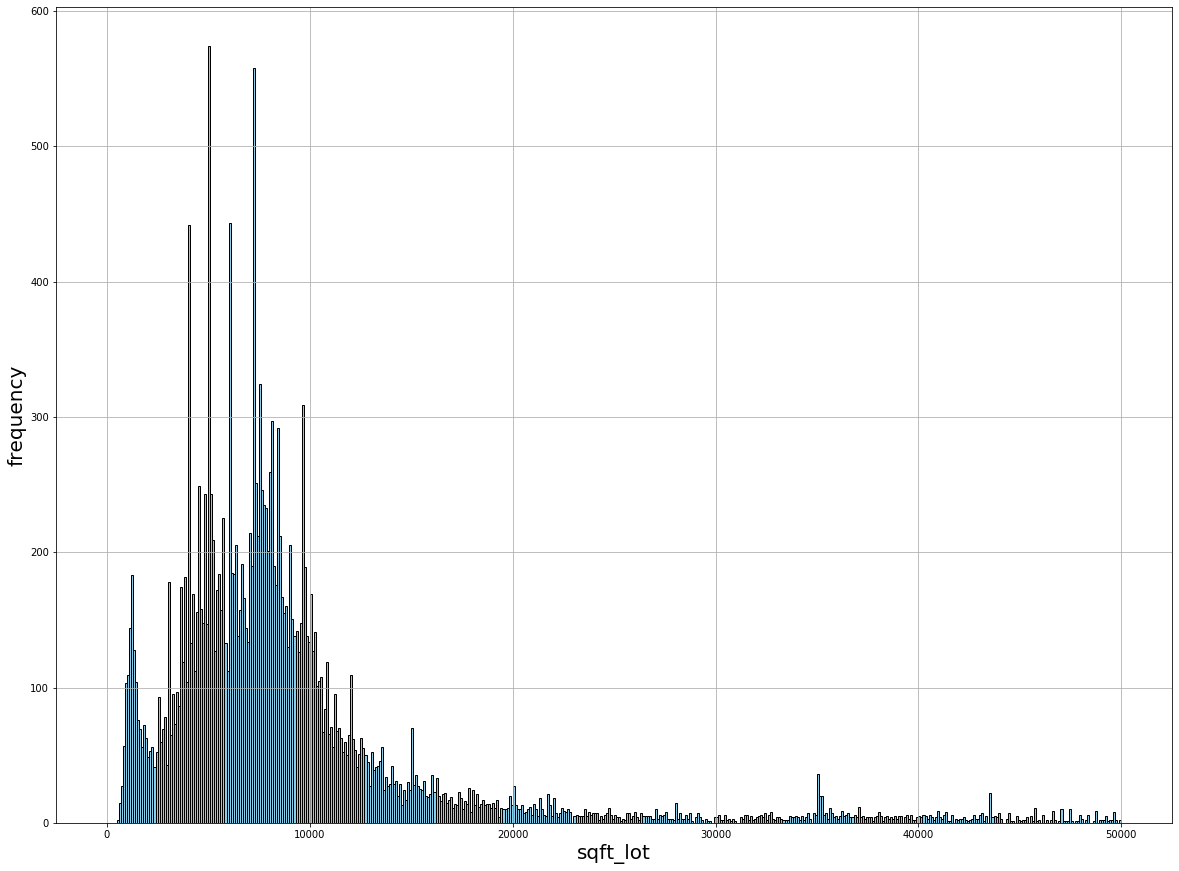

In [8]:
data_frame["sqft_lot"].hist(bins = 500, range=[0, 50000], color = "skyblue", ec = "black", figsize = (20,15))
plt.xlabel("sqft_lot", fontsize = (20))
plt.ylabel("frequency", fontsize = (20))
plt.show()

We can also double-check the aforementioned sqft_basement histogram using the same method.

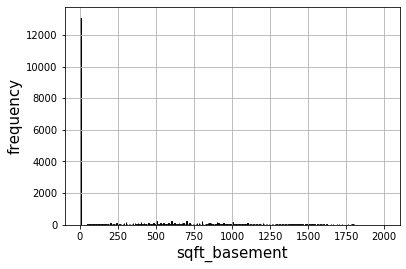

In [9]:
data_frame["sqft_basement"].hist(bins = 500, range=[0, 2000], color = "green", ec = "black")
plt.xlabel("sqft_basement", fontsize = (15))
plt.ylabel("frequency", fontsize = (15))
plt.show()

So it seems our initial analysis was correct in this case, that the majority of homes in this dataset do not have a basement space. This means that if a home has no basement space it is not helpful to our model to predict its price.

Note: In a couple steps the scatter plot shows the repeated values at 0, this shows the range of values that are possible given that a home has no basement space.

**Now we can create a correlation matrix to take highlight the correlation coefficients between variables**

The more red the cell is, the higher the correlation coefficient.  
Darker blue cells translate to lower correlation coefficients.

In [10]:
rs = np.random.RandomState(0)
corr = data_frame.corr()
corr.style.background_gradient(cmap='coolwarm')

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1,-0.0167622,0.00128628,0.00516023,-0.0122578,-0.132109,0.0185252,-0.00272109,0.0115924,-0.0237826,0.00813045,-0.0108421,-0.00515113,0.0213801,-0.016907,-0.00822432,-0.00189093,0.0207986,-0.002901,-0.138798
price,-0.0167622,1,0.30835,0.525138,0.702035,0.0896609,0.256794,0.266369,0.397293,0.0363618,0.667434,0.605567,0.323816,0.0540115,0.126434,-0.0532029,0.307003,0.0216262,0.585379,0.0824472
bedrooms,0.00128628,0.30835,1,0.515884,0.576671,0.0317032,0.175429,-0.00658248,0.0795319,0.0284721,0.356967,0.4776,0.303093,0.154178,0.0188408,-0.152668,-0.00893101,0.129473,0.391638,0.0292442
bathrooms,0.00516023,0.525138,0.515884,1,0.754665,0.0877397,0.500653,0.0637436,0.187737,-0.124982,0.664983,0.685342,0.28377,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.0871754
sqft_living,-0.0122578,0.702035,0.576671,0.754665,1,0.172826,0.353949,0.103818,0.284611,-0.0587526,0.762704,0.876597,0.435043,0.318049,0.0553629,-0.19943,0.0525295,0.240223,0.75642,0.183286
sqft_lot,-0.132109,0.0896609,0.0317032,0.0877397,0.172826,1,-0.00520099,0.0216037,0.0747101,-0.00895825,0.113621,0.183512,0.0152862,0.0530804,0.00764351,-0.129574,-0.0856828,0.229521,0.144608,0.718557
floors,0.0185252,0.256794,0.175429,0.500653,0.353949,-0.00520099,1,0.0236983,0.0294438,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.0063384,-0.0591206,0.0496141,0.125419,0.279885,-0.0112692
waterfront,-0.00272109,0.266369,-0.00658248,0.0637436,0.103818,0.0216037,0.0236983,1,0.401857,0.0166532,0.0827749,0.0720746,0.0805879,-0.0261611,0.0928848,0.0302847,-0.0142738,-0.0419102,0.0864631,0.0307033
view,0.0115924,0.397293,0.0795319,0.187737,0.284611,0.0747101,0.0294438,0.401857,1,0.0459897,0.251321,0.167649,0.276947,-0.0534399,0.103917,0.0848269,0.00615673,-0.0783997,0.280439,0.0725746
condition,-0.0237826,0.0363618,0.0284721,-0.124982,-0.0587526,-0.00895825,-0.263768,0.0166532,0.0459897,1,-0.144674,-0.158214,0.174105,-0.361417,-0.0606178,0.00302552,-0.014941,-0.1065,-0.0928243,-0.00340552


At first glance, it looks like there are a couple parameters that could be major contributing factors to the price of a house, I made a list of them and plotted them with price on the y-axis to look for potential correlations.

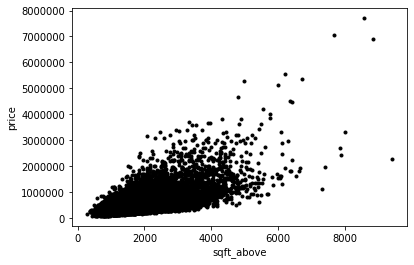

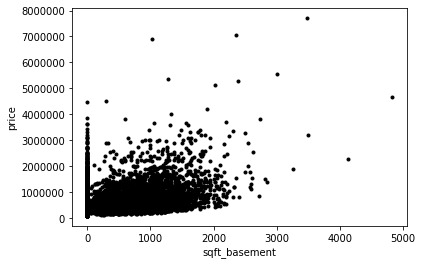

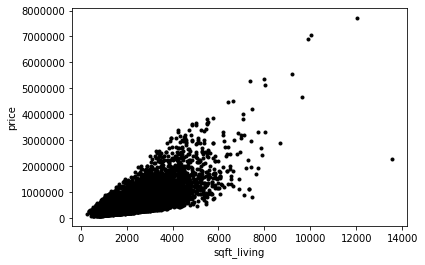

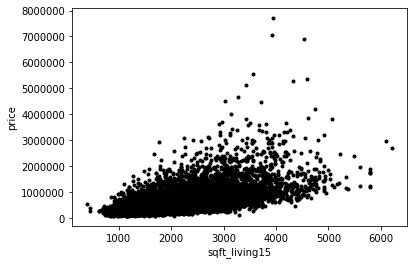

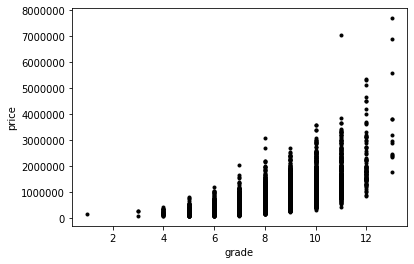

In [11]:
key_indicators = ["sqft_above", "sqft_basement", "sqft_living", "sqft_living15", "grade"]
y = data_frame["price"]

for indicator in key_indicators:
    plt.plot(data_frame[indicator], y, '.', color='black')
    plt.xlabel(indicator)
    plt.ylabel("price")
    plt.show()

For each of these graphs, the line of best fit yields a positive increase in the price of a house per unit increase of the value of the parameter. It should be this way when we think about it. For example, the sft_living which has the highest correllation coefficient with price, represents the total square footage of the house. Naturally, the larger the living space, the more expensive the house is on average.

In [9]:
print("hello world")
'''
%%capture
#gather features
features = "+".join(data_frame.columns - ["zipcode", "id", "lat", "long"])

# get y and X dataframes based on this regression:
y, X = dmatrices('annual_inc ~' + features, data_frame, return_type='dataframe')
'''

hello world


'\n%%capture\n#gather features\nfeatures = "+".join(data_frame.columns - ["zipcode", "id", "lat", "long"])\n\n# get y and X dataframes based on this regression:\ny, X = dmatrices(\'annual_inc ~\' + features, data_frame, return_type=\'dataframe\')\n'